# Aim: Classifying Cardiotocography (CTG) data to predict child and maternal mortality.

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
fh = pd.read_csv("fetal_health.csv")
# top 5 records of dataframe
fh.head() 

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [3]:
# Information of data
fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
# Distribution of data
fh.describe()

baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057                  0.000590   
min               0.000000              0.000000                  0.000000   
25%               0.000000              0.000000                  0.000000   
50%               0.000000              0.000000                  0.000000   
75%               0.003000              0.000000                  0.000000   
max               0.015000              0.001000                  0.005000   

       abnormal_short_term_variability  mean_value_of_short_term_variability  \
count                      2126.000000                           2126.000000   
mean                         46.990122                              1.332785   
std                          17.192814                              0.883241   
min                          12.000000                              0.200000   
25%                          32.000000                              0.700000   
50%                          49.000000                              1.200000   
75%                          61.000000                              1.700000   
max                          87.000000                              7.000000   

       percentage_of_time_with_abnormal_long_term_variability  ...  \
count                                         2126.00000       ...   
mean                                             9.84666       ...   
std                                             18.39688       ...   
min                                              0.00000       ...   
25%                                              0.00000       ...   
50%                                              0.00000       ...   
75%                                             11.00000       ...   
max                                             91.00000       ...   

       histogram_min  histogram_max  histogram_number_of_peaks  \
count    2126.000000    2126.000000                2126.000000   
mean       93.579492     164.025400                   4.068203   
std        29.560212      17.944183                   2.949386   
min        50.000000     122.000000                   0.000000   
25%        67.000000     152.000000                   2.000000   
50%        93.000000     162.000000                   3.000000   
75%       120.000000     174.000000                   6.000000   
max       159.000000     238.000000                  18.000000   

       histogram_number_of_zeroes  histogram_mode  histogram_mean  \
count                 2126.000000     2126.000000     2126.000000   
mean                     0.323612      137.452023      134.610536   
std                      0.706059       16.381289       15.593596   
min                      0.000000       60.000000       73.000000   
25%                      0.000000      129.000000      125.000000   
50%                      0.000000      139.000000      136.000000   
75%                      0.000000      148.000000      145.000000   
max                     10.000000      187.000000      182.000000   

       histogram_median  histogr

In [5]:
# count of null values across the columns
fh.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
# Gives the number of rows and columns in (r,c)
fh.shape    

(2126, 22)

In [7]:
#number of values for each column
fh.count()   

baseline value                                            2126
accelerations                                             2126
fetal_movement                                            2126
uterine_contractions                                      2126
light_decelerations                                       2126
severe_decelerations                                      2126
prolongued_decelerations                                  2126
abnormal_short_term_variability                           2126
mean_value_of_short_term_variability                      2126
percentage_of_time_with_abnormal_long_term_variability    2126
mean_value_of_long_term_variability                       2126
histogram_width                                           2126
histogram_min                                             2126
histogram_max                                             2126
histogram_number_of_peaks                                 2126
histogram_number_of_zeroes                             

# EDA

<AxesSubplot:xlabel='fetal_movement', ylabel='accelerations'>

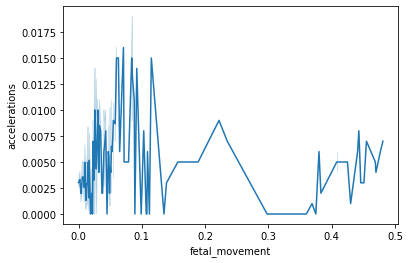

In [8]:
# Line plot for fetal_movement and accelerations
sns.lineplot(data=fh, x="fetal_movement", y="accelerations")

In [9]:
#count for each fetal_health 
fh.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

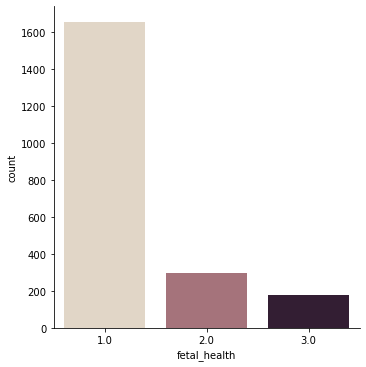

In [10]:
sns.catplot(x="fetal_health", kind="count", palette="ch:.25", data=fh)

In [11]:
sns.lineplot(data=fh, x="fetal_movement", y="accelerations", hue="fetal_health")

<AxesSubplot:xlabel='fetal_movement', ylabel='accelerations'>

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


C:\Users\ruffi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

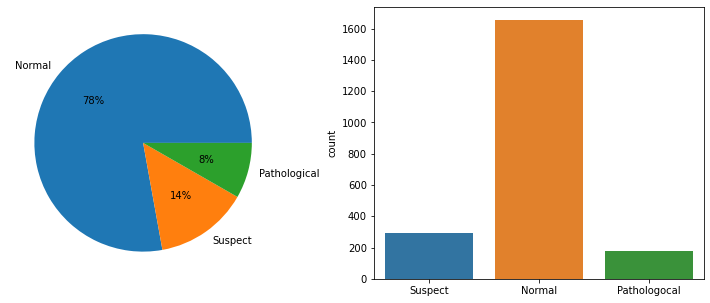

In [12]:
#Visualize each fetal_health category
a, b, c = fh['fetal_health'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b, c], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
print(fh["fetal_health"].value_counts())
Status = {1: 'Normal', 2: 'Suspect', 3: 'Pathologocal'}
fetal = [Status[i] for i in fh["fetal_health"]]
plt.subplot(122)
sns.countplot(fetal)

fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
Name: fetal_health, dtype: float64


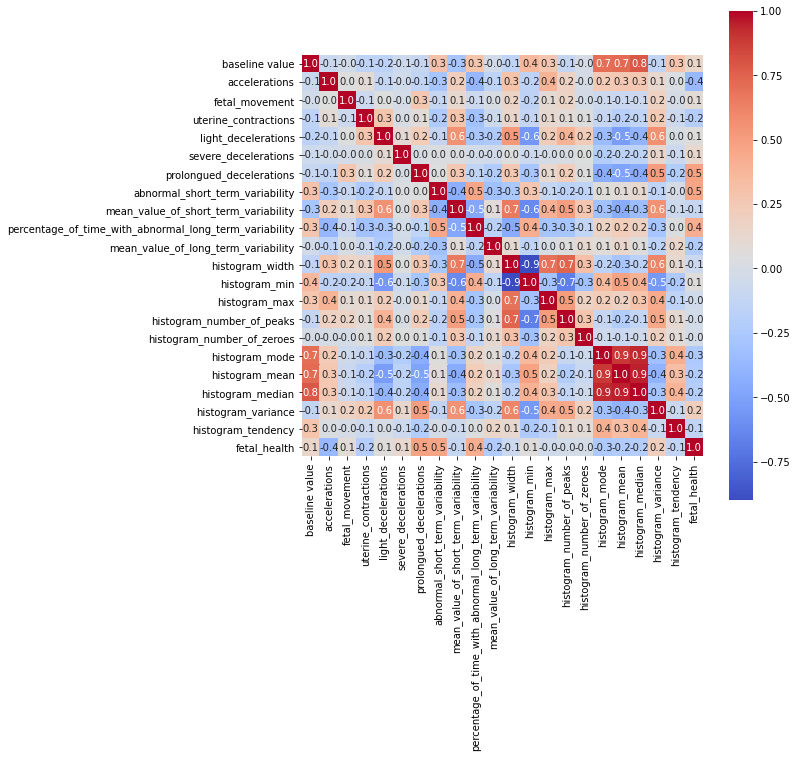

In [13]:
#Correlation berween fetal_health and other attributes
corr = fh.corr()
sort_corr = corr.sort_values(by=["fetal_health"], ascending=False).head(10)
plt.figure(figsize = (9,9))
sns.heatmap(fh.corr(), annot=True, cmap = "coolwarm", fmt = '.1f', cbar = True, square = True)
print(sort_corr.fetal_health)

array([[<AxesSubplot:title={'center':'baseline value'}>,
        <AxesSubplot:title={'center':'accelerations'}>,
        <AxesSubplot:title={'center':'fetal_movement'}>,
        <AxesSubplot:title={'center':'uterine_contractions'}>,
        <AxesSubplot:title={'center':'light_decelerations'}>],
       [<AxesSubplot:title={'center':'severe_decelerations'}>,
        <AxesSubplot:title={'center':'prolongued_decelerations'}>,
        <AxesSubplot:title={'center':'abnormal_short_term_variability'}>,
        <AxesSubplot:title={'center':'mean_value_of_short_term_variability'}>,
        <AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>],
       [<AxesSubplot:title={'center':'mean_value_of_long_term_variability'}>,
        <AxesSubplot:title={'center':'histogram_width'}>,
        <AxesSubplot:title={'center':'histogram_min'}>,
        <AxesSubplot:title={'center':'histogram_max'}>,
        <AxesSubplot:title={'center':'histogram_number_of_peaks'}>],
      

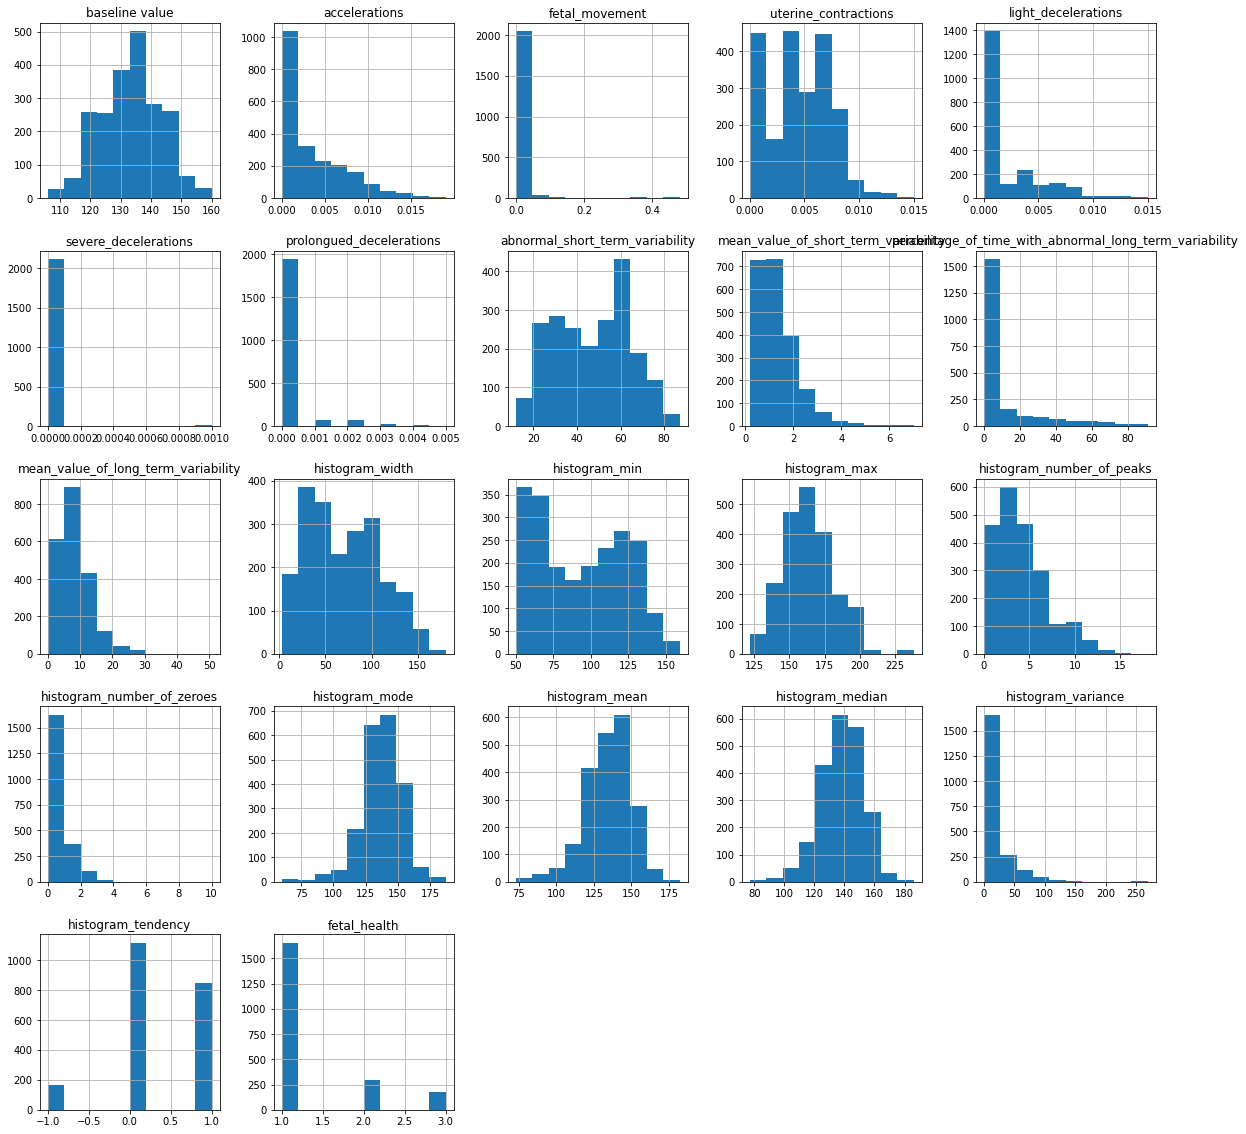

In [14]:
fh.hist(figsize = (20,20))

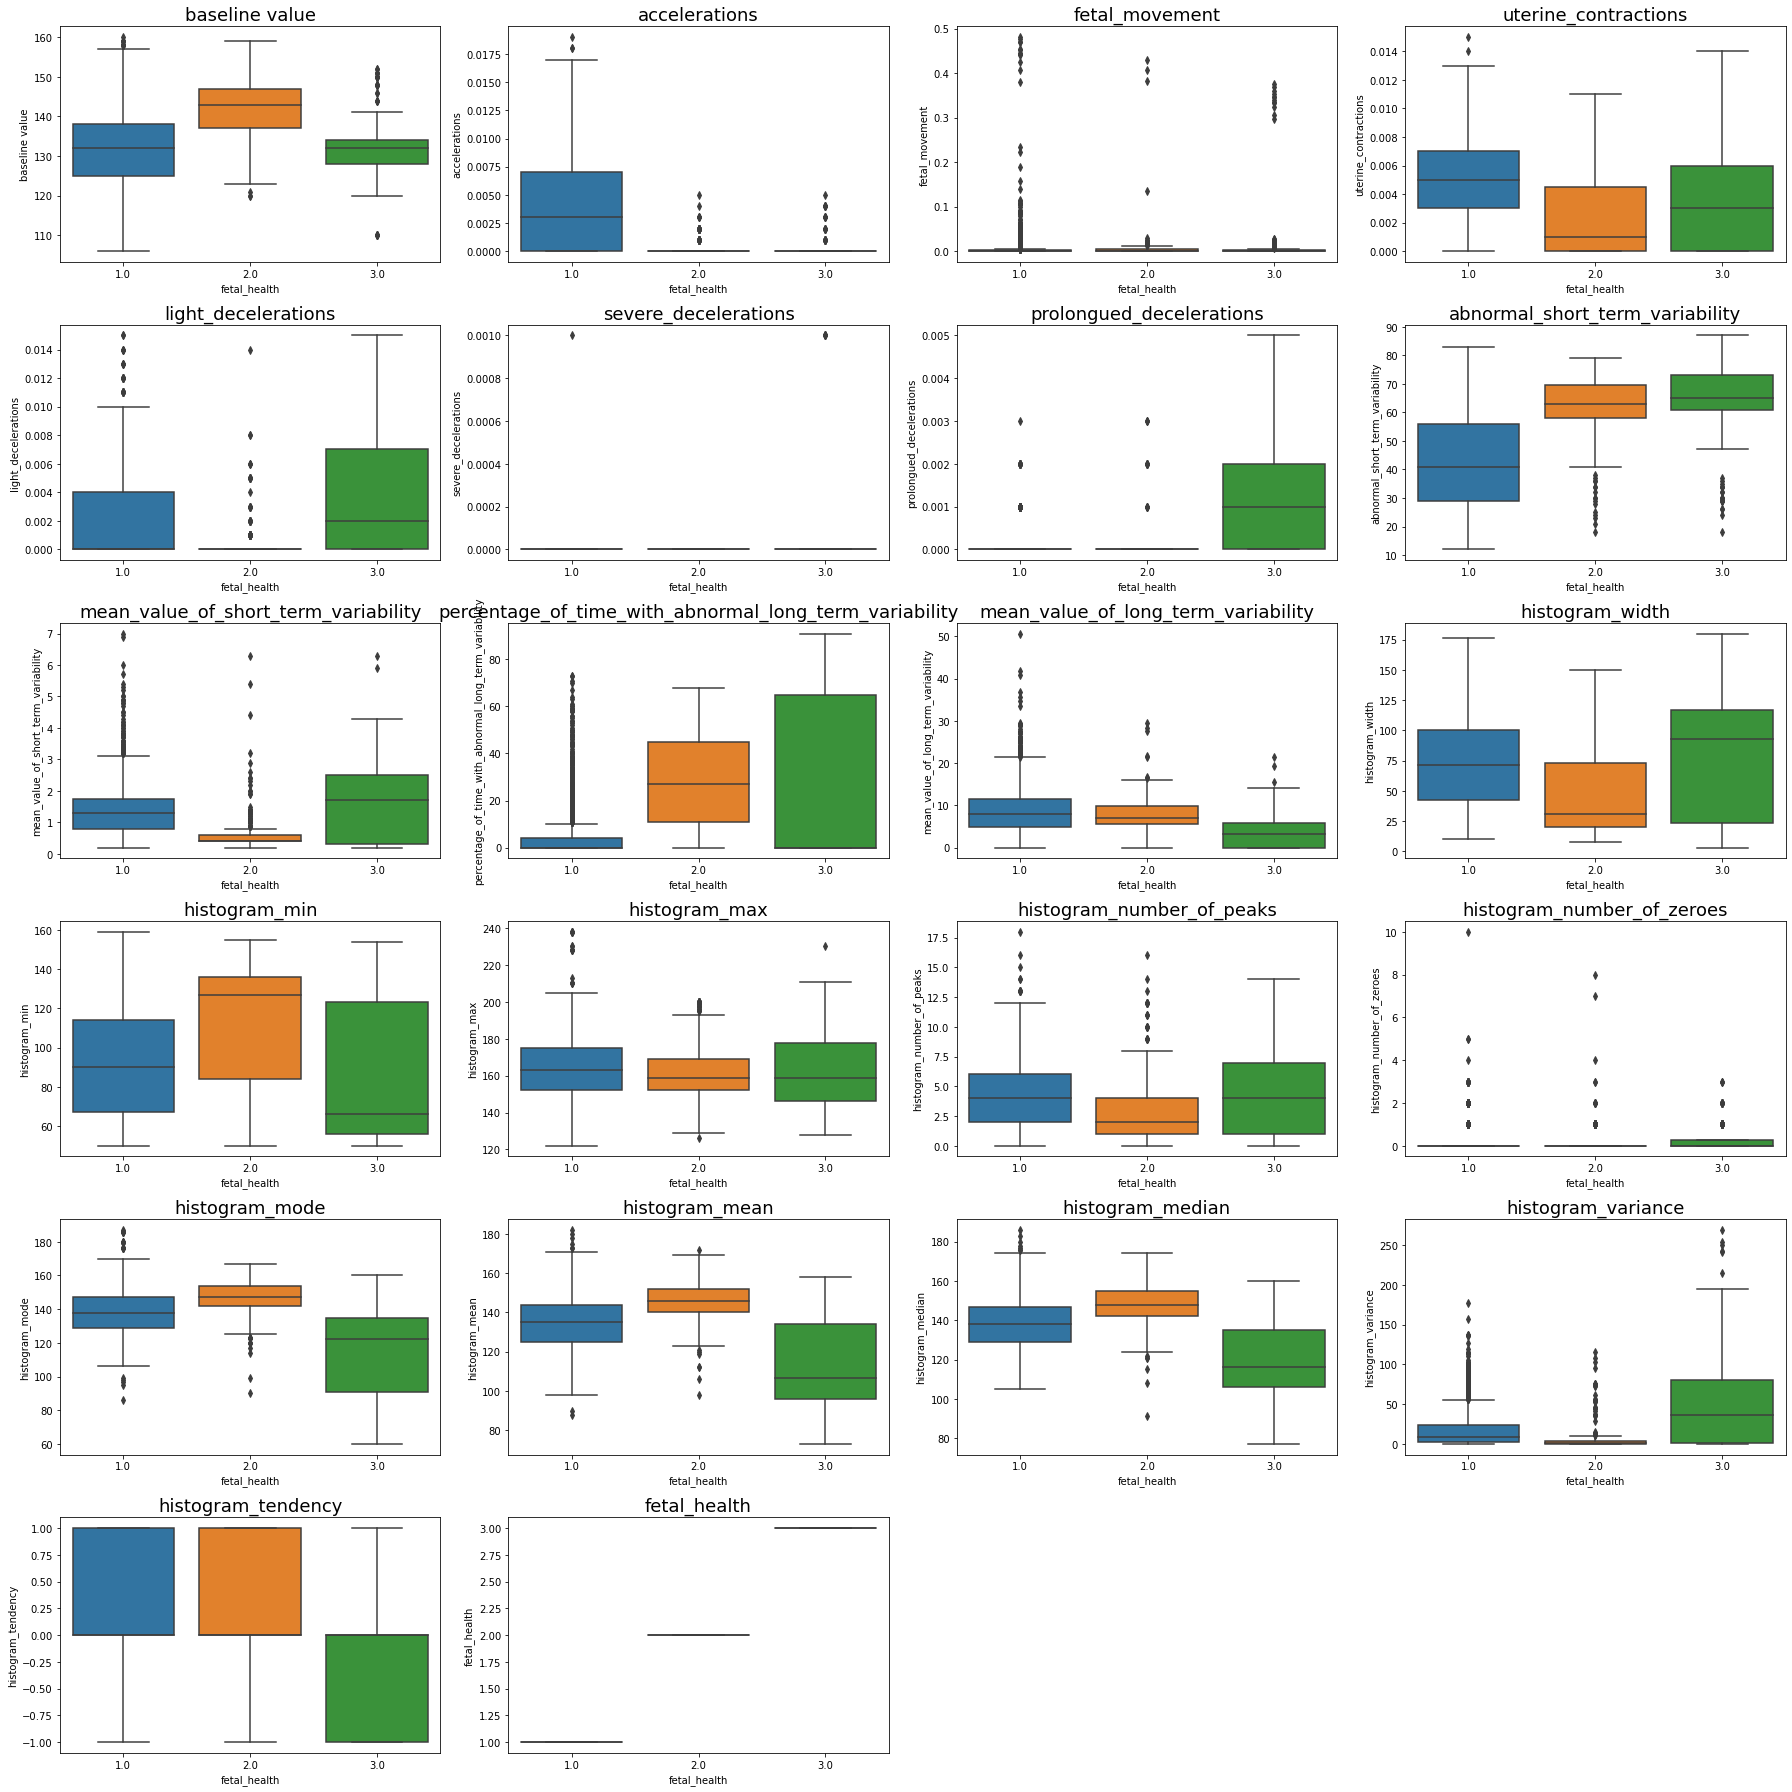

In [18]:
plt.figure(figsize=(25,25))
i=1
for col in fh.columns:
    plt.subplot(6,4,i)
    sns.boxplot(x='fetal_health', y=col, data=fh)
    plt.tight_layout()
    plt.title(col,fontsize=18)
    i+=1
    
    
#for most of the boxplots, fetal_health "Good" has the highest values for each column

**Data Preperation**


In [3]:
#Target attribute is y and predictor attribute is x.
#Target attribute is 'fetal_health'

# predictor attribute  
X = fh.iloc[:,:-1].values 
# target attribute
y = fh.iloc[:,-1].values       

In [4]:
#display of the target attribute(y)
y

array([2., 1., 1., ..., 2., 2., 1.])

**Encoding the categorical data**

The datatype of the target attribute is categorical data, the LabelEncoder will convert each class to the following values

-  2.0 = 1 
-  1.0 = 0
-  3.0 = 2


In [5]:
# Encoding the categorical data (fetal_health), which has 3 caregories
from sklearn.preprocessing import LabelEncoder
Labelencoder_y= LabelEncoder()
y= Labelencoder_y.fit_transform(y)

y

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

**Split the dataset for test and train**

In [6]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.15, random_state=0)


In [7]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

# KNN



**Building KNN Model**

In [8]:
# import the kNN model from scikit learn
from sklearn.neighbors import KNeighborsClassifier

**Initialize the KNN model**

In this step, we initialize the KNN model. We will set K as 5. The nearest neighbor metric = Euclidean distance with power 2. 

In [9]:
# initializing the model
knn= KNeighborsClassifier(n_neighbors=5 , metric= 'minkowski', p=2)  

**Fitting the KNN Model**

In [10]:
#fit the KNN  Model
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Making a Prediction**

In this part, we make a prediction of our test set dataset.

In [11]:
# Predicted the result
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0,

In [12]:
# Making  a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[234,   3,   0],
       [ 18,  29,   1],
       [  5,   3,  26]], dtype=int64)

<AxesSubplot:>

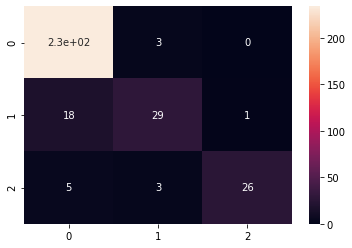

In [13]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(cm, annot = True)   

In [14]:
# check the accuracy score - KNN
from sklearn.metrics import accuracy_score

KNNAccuracy=accuracy_score(y_test, y_pred)
KNNAccuracy*100

90.59561128526646

# Random Forest


**Building Random Forest Model**

In [15]:
# import the random forest classifier from scikit learn
from sklearn.ensemble import RandomForestClassifier

**Initialize the Random Forest model**

In [16]:
#initialize the RF model using Entropy
RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

**Fitting the Random Forest Model**

In [17]:
#fit the RF Model
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

**Making a Prediction**

In this part, we make a prediction of our test set dataset.


In [18]:
# Predict the result
y_pred=RF.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[233,   3,   1],
       [ 16,  32,   0],
       [  4,   3,  27]], dtype=int64)

<AxesSubplot:>

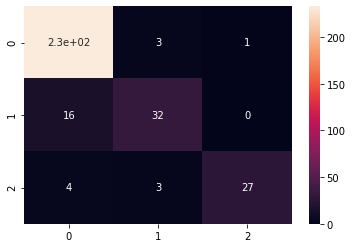

In [20]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(cm, annot = True)  

In [21]:
# check the accuracy score - RF
from sklearn.metrics import accuracy_score
RandForestAccuracy=accuracy_score(y_test, y_pred)
RandForestAccuracy*100

91.53605015673982

# Logistic Regression

In [22]:
# import the Logistic Regression model from scikit learn
from sklearn.linear_model import LogisticRegression

In [23]:
log_reg = LogisticRegression(max_iter = 500) 
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

**Making a Prediction**

In this part, we make a prediction and comparison.

In [24]:
y_pred = log_reg.predict(X_test)

compare_fh = pd.DataFrame({"Actuals": y_test,
                          "Predicted": y_pred})
compare_fh.head(10)

Actuals  Predicted
0        0          0
1        0          0
2        0          0
3        0          1
4        1          1
5        0          0
6        0          0
7        0          0
8        0          0
9        1          1

In [25]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix = \n", str(conf_mat))

Confusion Matrix = 
 [[228   8   1]
 [ 16  31   1]
 [  7   5  22]]


<AxesSubplot:>

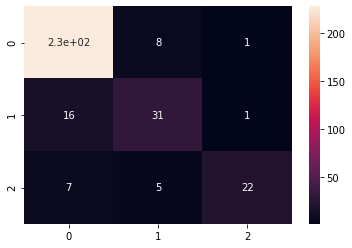

In [26]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(conf_mat, annot=True)

In [27]:
# check the accuracy score - LR
from sklearn.metrics import accuracy_score
LogisticRegAccuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy = ", str(LogisticRegAccuracy))

Testing Accuracy =  0.8808777429467085


# Support Vector Classifier (Linear Kernel) 

**Building Support Vector Classifier Model**



In [28]:
# import support vector machine from scikit learn
from sklearn.svm import SVC

In [29]:
# initialize the svm model
SVM = SVC(kernel = 'linear')

In [30]:
#fit the SVM Model
SVM.fit(X_train,y_train)

SVC(kernel='linear')

**Making a Prediction**

In this part, we make a prediction of our test set dataset.


In [31]:
# Predicted the result
y_pred= SVM.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,

In [32]:
# print the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[229,   7,   1],
       [ 17,  30,   1],
       [  6,   4,  24]], dtype=int64)

<AxesSubplot:>

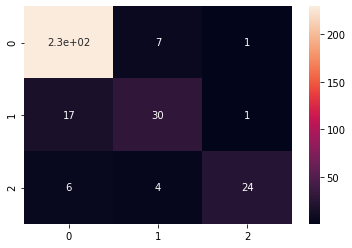

In [33]:
# Visualizing the confusion matrix with a heatmap
sns.heatmap(cm, annot=True)

In [34]:
# check the accuracy score - SVC
from sklearn.metrics import accuracy_score
SVMAccuracy=accuracy_score(y_test, y_pred)
SVMAccuracy*100

88.71473354231975

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score

In [36]:
model = [knn, RF, log_reg, SVM]
for model in model:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(model,'\n', 'Classification_Report:','\n', report, '\n')

KNeighborsClassifier() 
 Classification_Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       237
           1       0.83      0.60      0.70        48
           2       0.96      0.76      0.85        34

    accuracy                           0.91       319
   macro avg       0.90      0.79      0.83       319
weighted avg       0.90      0.91      0.90       319
 

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) 
 Classification_Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       237
           1       0.84      0.67      0.74        48
           2       0.96      0.79      0.87        34

    accuracy                           0.92       319
   macro avg       0.91      0.81      0.86       319
weighted avg       0.91      0.92      0.91       319
 

LogisticRegression(max_iter=500) 
 Classification_Report: 
               precis

In [39]:
print(f'K Neighbors Classifier: {round(100*KNNAccuracy, 2)}%\nRandom Forest Classifier: {round(100*RandForestAccuracy, 2)}%\nLogistic Regression: {round(100*LogisticRegAccuracy, 2)}%\nSupport Vector Classifier: {round(100*SVMAccuracy, 2)}%')

K Neighbors Classifier: 90.6%
Random Forest Classifier: 91.54%
Logistic Regression: 88.09%
Support Vector Classifier: 88.71%
